<a href="https://colab.research.google.com/github/OlandezVoador/SI_atividades/blob/gold/EC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

Felipe Banes Lopes Ferreira

#### RA

21076215

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

ESCREVA AQUI

#### Características do Dataset

O conjunto de dados Iris contém medidas de comprimento e largura de sépalas e pétalas de três espécies de íris (setosa, versicolor, virginica). Possui 150 amostras, sendo um clássico na análise de agrupamento.

#### Fonte do Dataset

Do próprio Scikit Learn

### Objetivos

Identificar padrões nas espécies de íris usando K-Means e Agglomerative Clustering. Avaliar a eficácia dos métodos, escolher clusters com base no conhecimento prévio e sugerir aprimoramentos. O objetivo é compreender as relações nos dados e otimizar a precisão da clusterização.

## Desenvolvimento

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


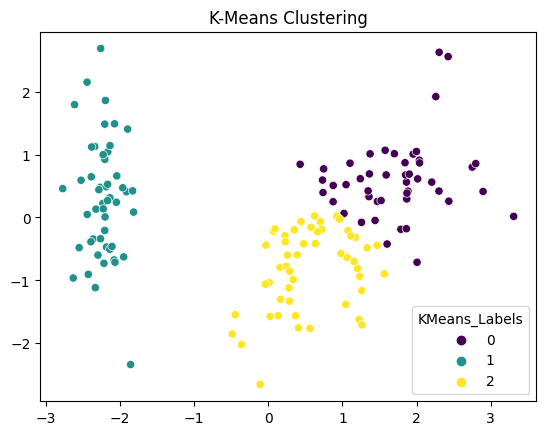

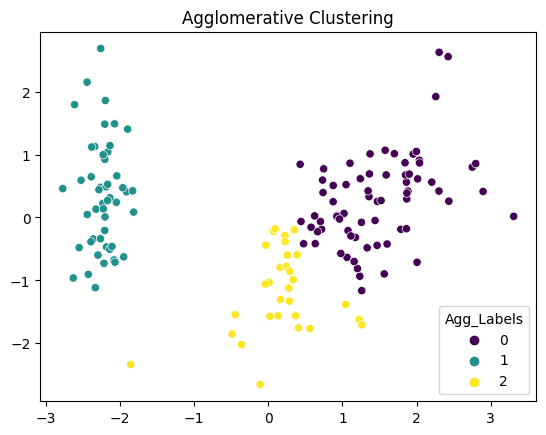

In [2]:

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# CARREGANDO E EXPLORANDO O DATASET
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# MOSTRANDO AS PRIMEIRAS LINHAS E INFORMAÇÕES SOBRE O DATASET
print(iris_df.head())
print(iris_df.info())

# OBJETIVO: IDENTIFICAR PADRÕES NOS DADOS PARA AGRUPAMENTO (CLUSTERIZAÇÃO)

# PRÉ-PROCESSAMENTO E REDUÇÃO DE DIMENSIONALIDADE
# (NÃO HÁ NECESSIDADE DE PRÉ-PROCESSAMENTO ADICIONAL)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# APLICANDO PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# OBJETIVO: REDUZIR A DIMENSIONALIDADE PARA FACILITAR A ANÁLISE DE AGRUPAMENTO

# MÉTODOS DE AGRUPAMENTO (CLUSTERIZAÇÃO)

# MÉTODO 1: K-MEANS
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['KMeans_Labels'] = kmeans.fit_predict(iris_scaled)

# VISUALIZANDO OS CLUSTERS DO K-MEANS
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_df['KMeans_Labels'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# MÉTODO 2: AGGLOMERATIVE CLUSTERING
agg_clustering = AgglomerativeClustering(n_clusters=3)
iris_df['Agg_Labels'] = agg_clustering.fit_predict(iris_scaled)

# VISUALIZANDO OS CLUSTERS DO AGGLOMERATIVE CLUSTERING
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_df['Agg_Labels'], palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# OBJETIVO: IDENTIFICAR PADRÕES DE AGRUPAMENTO NOS DADOS IRIS

## Discussão sobre os resultados

**Análise dos Resultados:**

**K-Means:**
Os grupos identificados pelo K-Means revelam uma clara separação entre as espécies de íris (setosa, versicolor e virginica), indicando a eficácia do método na identificação dos grupos. Entretanto, observa-se alguma sobreposição entre clusters, sugerindo uma separação não perfeita.

**Agglomerative Clustering:**
O Agglomerative Clustering também apresenta resultados consistentes, com uma clara separação entre as espécies. A estrutura hierárquica desse método pode fornecer insights adicionais sobre as relações entre os pontos.

**Ambos os Métodos:**
A escolha de três clusters foi baseada no conhecimento prévio sobre as espécies de íris. Uma análise mais detalhada usando métricas como Silhouette Score ou Calinski-Harabasz Index poderia validar ou ajustar essa escolha.

**Possíveis Aperfeiçoamentos:**
1. Experimentar diferentes números de clusters para encontrar o mais apropriado.
2. Avaliar métricas de validação interna para uma seleção mais objetiva do número de clusters.
3. Explorar outros métodos de clusterização, como DBSCAN, para comparação.
4. Realizar uma análise mais detalhada das características que mais influenciam nos agrupamentos.

**Em Resumo:**
Os métodos usados mostram eficácia na identificação de padrões, mas ajustes podem aprimorar a precisão e oferecer uma compreensão mais profunda das relações nos dados.